### Image Gradients

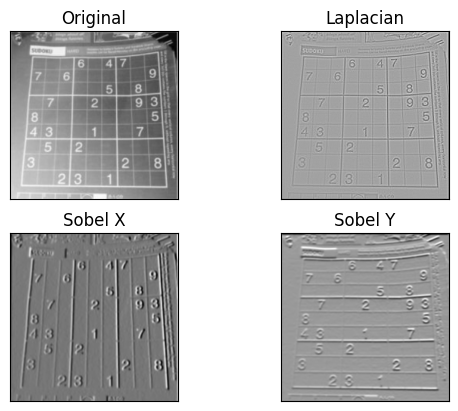

In [10]:
# Sobel operators is a joint Gaussian smoothing plus differentiation operation, so it is more resistant to noise.



import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)


plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


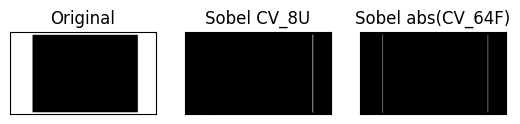

In [11]:
# If you want to detect both edges, better option is to keep the output datatype to some higher forms,
# like cv.CV_16S, cv.CV_64F etc, take its absolute value and then convert back to cv.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('box.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()



### Canny Edge Detection

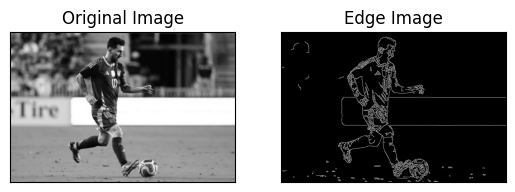

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('img.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Contour Features

{'m00': 289872.0, 'm10': 183687805.8333333, 'm01': 169766858.66666666, 'm20': 127144626665.5, 'm11': 107578520236.58333, 'm02': 106954408173.33333, 'm30': 94187341493805.06, 'm21': 74463202068005.81, 'm12': 67775549255627.85, 'm03': 71457244732800.2, 'mu20': 10744249906.570694, 'mu11': -348269.85261535645, 'mu02': 7528501905.918854, 'mu30': 621572564.140625, 'mu21': -64199511.92871094, 'mu12': 454344064.7050781, 'mu03': -136919125.359375, 'nu20': 0.12786849903616707, 'nu11': -4.144797794235832e-06, 'nu02': 0.08959752863827646, 'nu30': 1.373966580180299e-05, 'nu21': -1.4191099952407012e-06, 'nu12': 1.0043132480776953e-05, 'nu03': -3.026554151266194e-06}
 Центр формы 633,585
Периметр 3890.654205083847


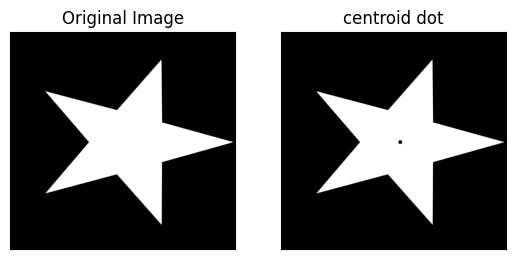

In [42]:
# Image moments help you to calculate some features like center of mass of the object, area of the object etc.

import numpy as np
import cv2 as cv
img = cv.imread('star.png', cv.IMREAD_GRAYSCALE)
orig = img.copy()
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

# From this moments, you can extract useful data like area, centroid etc.

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(f" Центр формы {cx},{cy}")
perimeter = cv.arcLength(cnt,True)
print("Периметр", perimeter)
M = cv.moments(cnt)

image = cv.circle(img, (cx,cy), radius=10, color=(0, 0, 255), thickness=-1)

plt.subplot(121),plt.imshow(orig,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image,cmap = 'gray')
plt.title('centroid dot'), plt.xticks([]), plt.yticks([])
plt.show()

Количество точек в исходном контуре: 266
Количество точек после аппроксимации: 22


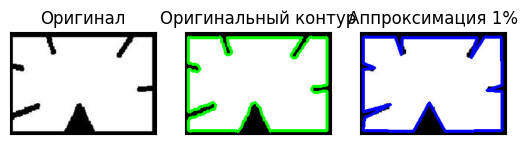

In [75]:
# Contour Approximation

# It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.

import numpy as np
import cv2 as cv

# Загрузка изображения
img = cv.imread('approx.png', cv.IMREAD_GRAYSCALE)
orig = img.copy()
assert img is not None, "file could not be read, check with os.path.exists()"


# Преобразование в цветное для рисования цветных контуров
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
orig_color = cv.cvtColor(orig, cv.COLOR_GRAY2BGR)
# Поиск контуров
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]

# Аппроксимация контура
epsilon = 0.01 * cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt, epsilon, True)

# Рисование исходного контура (зеленый)
cv.drawContours(orig_color, [cnt], -1, (0, 255, 0), 3)

# Рисование аппроксимированного контура (красный)
cv.drawContours(img_color, [approx], -1, (0, 0, 255), 3)

# Вывод результатов
print(f"Количество точек в исходном контуре: {len(cnt)}")
print(f"Количество точек после аппроксимации: {len(approx)}")

# Показать изображения

# Создать объединенное изображение для сравнения
combined = np.hstack([orig_color, img_color])

plt.subplot(131),plt.imshow(orig,cmap = 'gray')
plt.title('Оригинал'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(orig_color,cmap = 'gray')
plt.title('Оригинальный контур'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_color,cmap = 'gray')
plt.title('Аппроксимация 1%'), plt.xticks([]), plt.yticks([])
plt.show()



Convex Hull

Контур выпуклый: False


C:\Users\roman\AppData\Local\Temp\ipykernel_39708\1985193647.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x_line * vy / vx) + y_line)
C:\Users\roman\AppData\Local\Temp\ipykernel_39708\1985193647.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols - x_line) * vy / vx) + y_line)


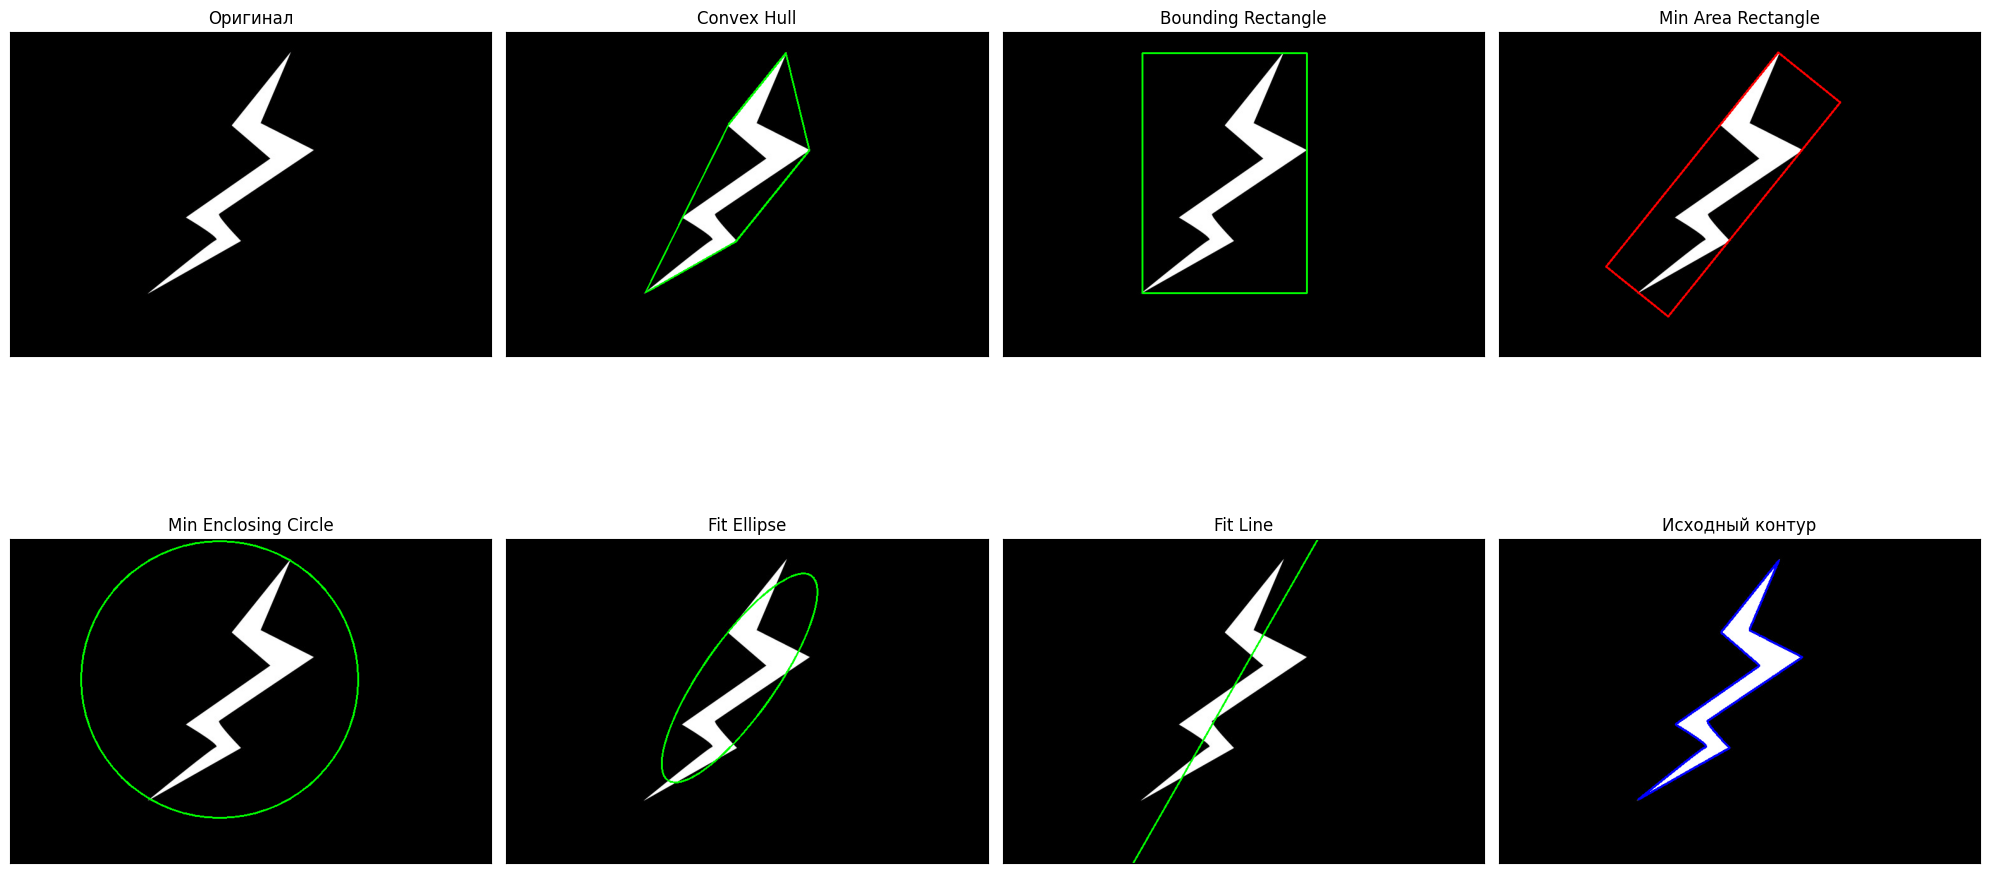

In [84]:
# convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects.

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Загрузка изображения
img = cv.imread('lightning.png', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"

# Создаем копии для разных методов
orig = img.copy()
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
img_bounding_rect = img_color.copy()
img_min_area_rect = img_color.copy()
img_min_circle = img_color.copy()
img_ellipse = img_color.copy()
img_fit_line = img_color.copy()
img_convex_hull = img_color.copy()

# Поиск контуров
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]

# 1. Convex Hull
hull = cv.convexHull(cnt)
cv.drawContours(img_convex_hull, [hull], 0, (0, 255, 0), 2)

# Проверка выпуклости
k = cv.isContourConvex(cnt)
print(f"Контур выпуклый: {k}")

# 2. Bounding Rectangle
x, y, w, h = cv.boundingRect(cnt)
cv.rectangle(img_bounding_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 3. Minimum Area Rectangle
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int64(box)
cv.drawContours(img_min_area_rect, [box], 0, (0, 0, 255), 2)

# 4. Minimum Enclosing Circle
(x_circle, y_circle), radius = cv.minEnclosingCircle(cnt)
center = (int(x_circle), int(y_circle))
radius = int(radius)
cv.circle(img_min_circle, center, radius, (0, 255, 0), 2)

# 5. Fit Ellipse
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img_ellipse, ellipse, (0, 255, 0), 2)

# 6. Fit Line
rows, cols = img.shape[:2]
[vx, vy, x_line, y_line] = cv.fitLine(cnt, cv.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x_line * vy / vx) + y_line)
righty = int(((cols - x_line) * vy / vx) + y_line)
cv.line(img_fit_line, (cols - 1, righty), (0, lefty), (0, 255, 0), 2)

# Отображение результатов
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1), plt.imshow(orig, cmap='gray')
plt.title('Оригинал'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 2), plt.imshow(cv.cvtColor(img_convex_hull, cv.COLOR_BGR2RGB))
plt.title('Convex Hull'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 3), plt.imshow(cv.cvtColor(img_bounding_rect, cv.COLOR_BGR2RGB))
plt.title('Bounding Rectangle'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 4), plt.imshow(cv.cvtColor(img_min_area_rect, cv.COLOR_BGR2RGB))
plt.title('Min Area Rectangle'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 5), plt.imshow(cv.cvtColor(img_min_circle, cv.COLOR_BGR2RGB))
plt.title('Min Enclosing Circle'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 6), plt.imshow(cv.cvtColor(img_ellipse, cv.COLOR_BGR2RGB))
plt.title('Fit Ellipse'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 7), plt.imshow(cv.cvtColor(img_fit_line, cv.COLOR_BGR2RGB))
plt.title('Fit Line'), plt.xticks([]), plt.yticks([])

# Отображение исходного контура для сравнения
img_orig_contour = img_color.copy()
cv.drawContours(img_orig_contour, [cnt], -1, (255, 0, 0), 2)
plt.subplot(2, 4, 8), plt.imshow(cv.cvtColor(img_orig_contour, cv.COLOR_BGR2RGB))
plt.title('Исходный контур'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
